In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'input\train.csv')
df.tail()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.99300,0.824000,0.0984,0.177,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.85800,0.000016,0.0705,0.335,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.00003,0.000136,0.6660,0.262,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.00129,0.916000,0.2560,0.355,131.363,219693.0,4,8
17995,The Raconteurs,Broken Boy Soldier,43.0,0.400,0.853,4.0,-5.320,0,0.0591,0.00604,0.212000,0.3340,0.377,138.102,182227.0,4,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [4]:
df.shape

(17996, 17)

In [5]:
df.isna().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [6]:
numeric_cols = df.select_dtypes(include='number')
mean = numeric_cols.mean()
data = df.fillna(mean)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17996 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 17996 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    17996 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Popularity,17996.0,44.512124,17.218436,1.000000,33.000000,44.000000,56.000000,100.000
danceability,17996.0,0.543433,0.166268,0.059600,0.432000,0.545000,0.659000,0.989
energy,17996.0,0.662777,0.235373,0.000020,0.509000,0.700000,0.860000,1.000
key,17996.0,5.952447,3.012651,1.000000,4.000000,5.952447,8.000000,11.000
loudness,17996.0,-7.910660,4.049151,-39.952000,-9.538000,-7.016000,-5.189000,1.355
mode,17996.0,0.636753,0.480949,0.000000,0.000000,1.000000,1.000000,1.000
speechiness,17996.0,0.079707,0.083576,0.022500,0.034800,0.047400,0.083000,0.955
acousticness,17996.0,0.247082,0.310632,0.000000,0.004300,0.081400,0.434000,0.996
instrumentalness,17996.0,0.177562,0.264499,0.000001,0.000294,0.049850,0.177562,0.996
liveness,17996.0,0.196170,0.159212,0.011900,0.097500,0.129000,0.258000,1.000


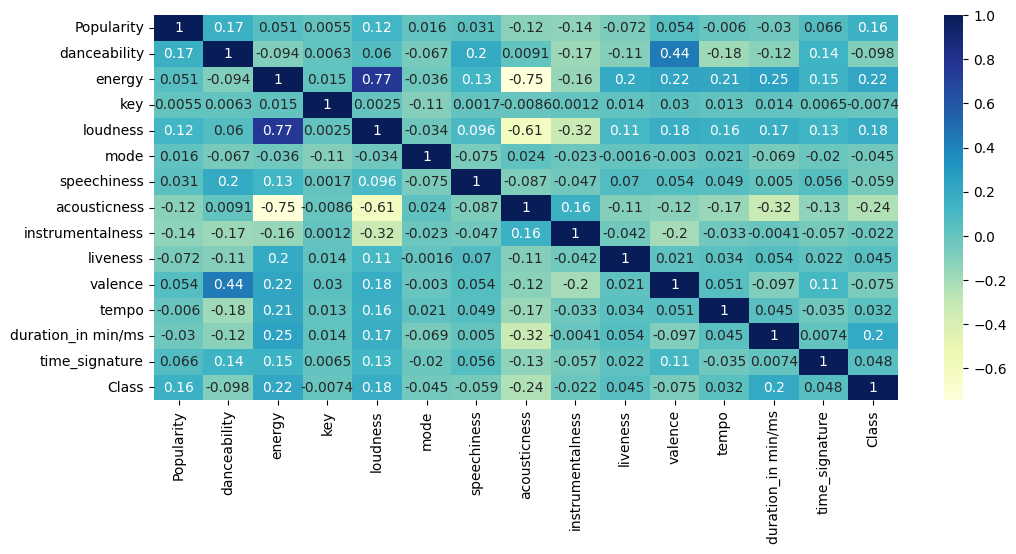

In [8]:
plt.figure(figsize=(12, 5))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='YlGnBu');

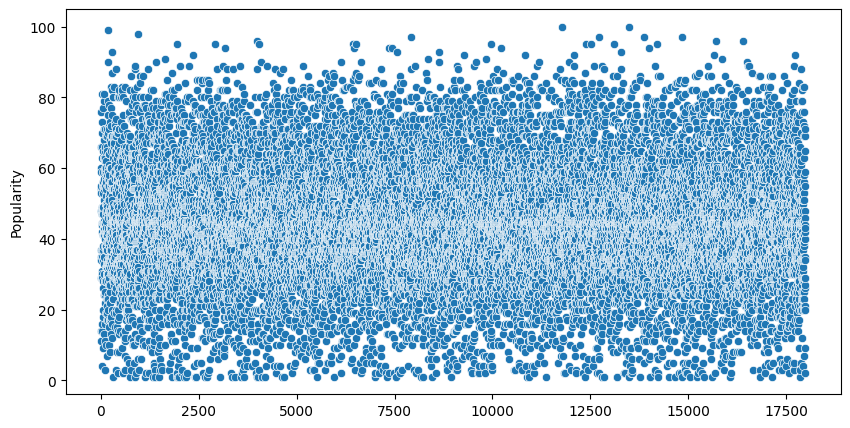

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(data['Popularity'])
plt.show()

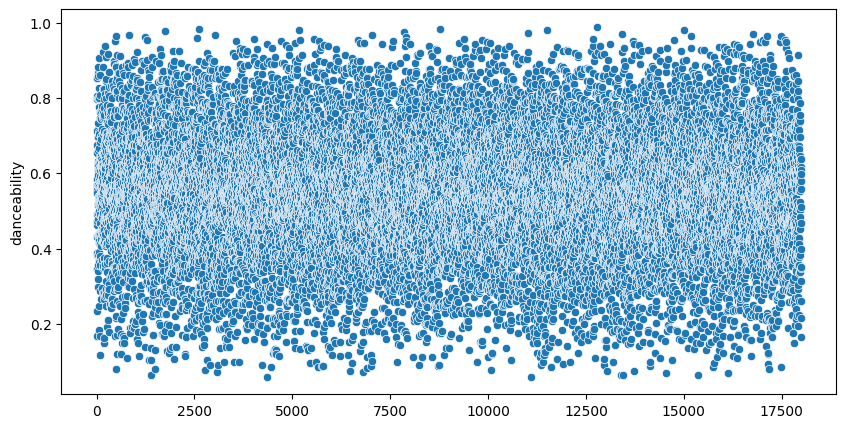

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(data['danceability'])
plt.show()

In [11]:
plt.figure(figsize=(40,8))
# 인기도가 높은(내림차순) --> 평균,노래 제목별(그룹) 10개
x = data.groupby('Track Name')['Popularity'].mean() \
    .sort_values(ascending=False).head(10)

x

Track Name
Beggin'                                         100.0
STAY (with Justin Bieber)                        97.0
Kiss Me More (feat. SZA)                         96.0
Fiel                                             95.0
Peaches (feat. Daniel Caesar & Giveon)           95.0
Permission to Dance                              95.0
Todo De Ti                                       95.0
I WANNA BE YOUR SLAVE                            95.0
Save Your Tears (with Ariana Grande) (Remix)     94.0
The Business                                     94.0
Name: Popularity, dtype: float64

<Figure size 4000x800 with 0 Axes>

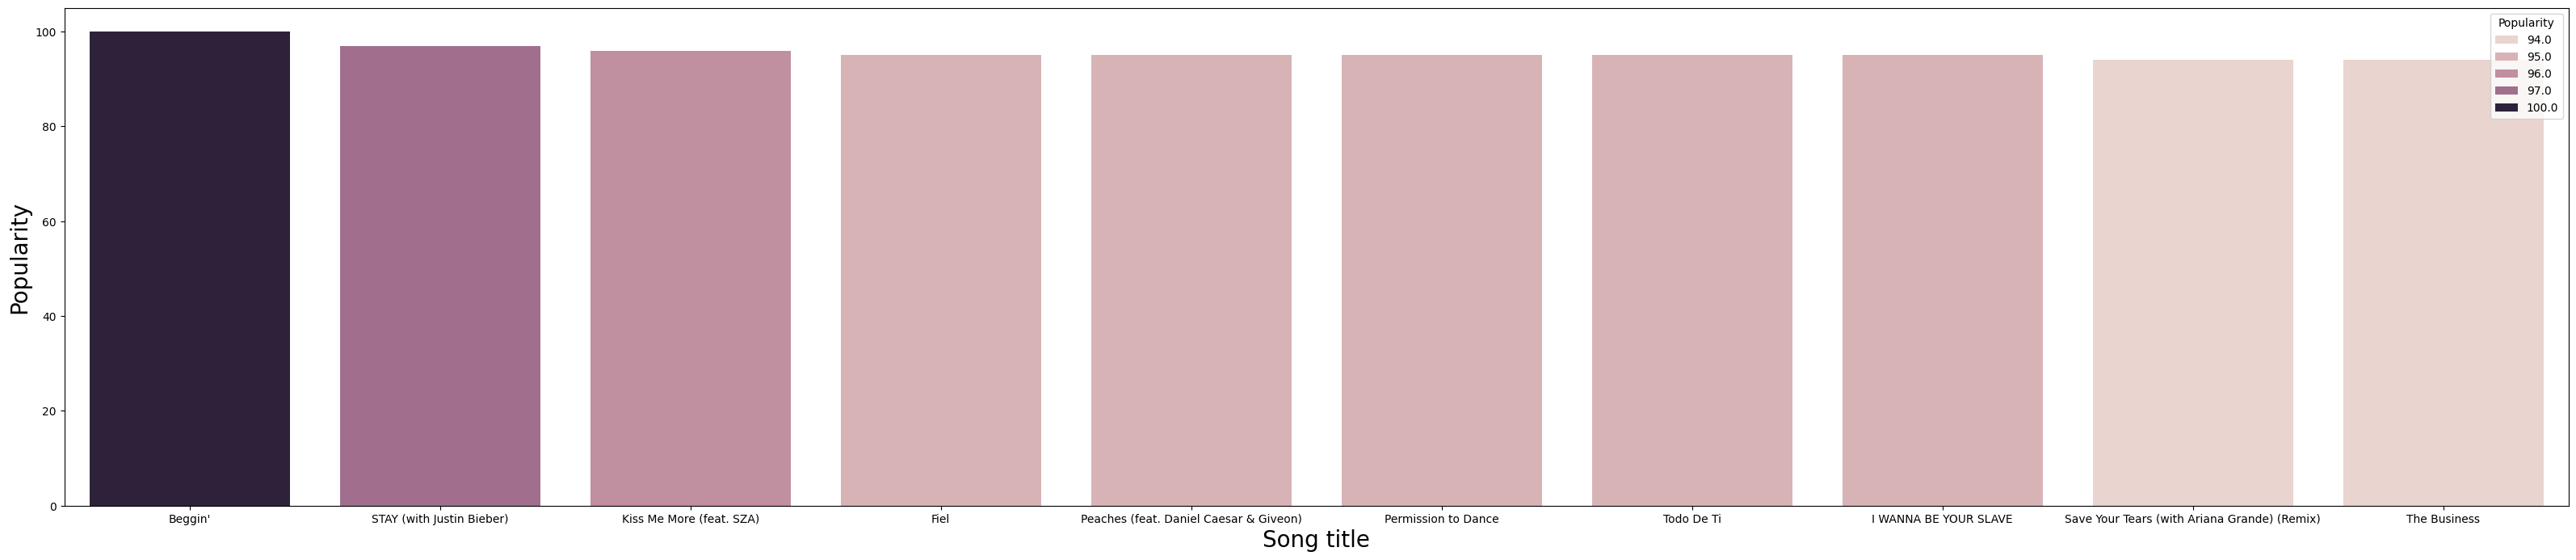

In [12]:
plt.figure(figsize=(40,8))
# 인기도가 높은(내림차순) --> 평균,노래 제목별(그룹) 10개
x = data.groupby('Track Name')['Popularity'].mean() \
    .sort_values(ascending=False).head(10)
axis = sns.barplot(x=x.index,y=x,hue=x)
axis.set_ylabel('Popularity',fontsize=20)
axis.set_xlabel('Song title',fontsize=20)
plt.show()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17996 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 17996 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    17996 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [14]:
#독립변수
X = data.iloc[:,2:16] # Artist name,Track Name제외,Class(장리) 제외
# 종속변수
y =data['Class']

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(14396, 14) (3600, 14) (14396,) (3600,)


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC # 선형 분류

svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('linear_svs',LinearSVC(C=1 ,loss = 'hinge',random_state=42))
]) # 서포트 벡터

svm_clf.fit(X_train,y_train)

c:\miniconda\envs\m03\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,steps,"[('scaler', ...), ('linear_svs', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001


In [30]:
# 성능 테스트
svm_clf.score(X_train,y_train)

0.3224506807446513

In [31]:
# 평가
svm_clf.score(X_test,y_test)

0.3186111111111111